<a href="https://colab.research.google.com/github/Namratha36/Amazon_Clone/blob/main/embedding_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q sentence-transformers wordcloud matplotlib seaborn pandas scikit-learn xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud

# Machine Learning & Metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Embeddings
from sentence_transformers import SentenceTransformer

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# NOTE: Update the path below to where you saved 'Tweets.csv' in your Drive
# If you uploaded it directly to the Colab runtime, use: file_path = 'Tweets.csv'
file_path = '/content/Tweets.csv' # It usually looks like this
df = pd.read_csv(file_path)

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print("❌ File not found. Please upload 'Tweets.csv' to the Files tab or adjust the file_path.")
    # Fallback for demonstration if file isn't found (Optional: Create dummy data)
    # Stop execution if data is missing
    raise

# Check for nulls and drop them
df.dropna(subset=['text', 'sentiment'], inplace=True)

✅ Dataset loaded successfully!
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  


In [ ]:
def clean_text(text):
    """
    Cleans text by converting to lowercase, removing links,
    user handles, and special characters.
    """
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'@\w+', '', text) # Remove user @ mentions
    text = re.sub(r'#\w+', '', text) # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    return text

df['clean_text'] = df['text'].apply(clean_text)

# Analysis of Text Length
df['text_length'] = df['clean_text'].apply(len)

print("\n✅ Preprocessing Complete. Sample:")
print(df[['text', 'clean_text']].head())


✅ Preprocessing Complete. Sample:
                                                text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                                          clean_text  
0                  id have responded if i were going  
1         sooo sad i will miss you here in san diego  
2                             my boss is bullying me  
3                      what interview leave me alone  
4   sons of  why couldnt they put them on the rel...  


/tmp/ipython-input-918092241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


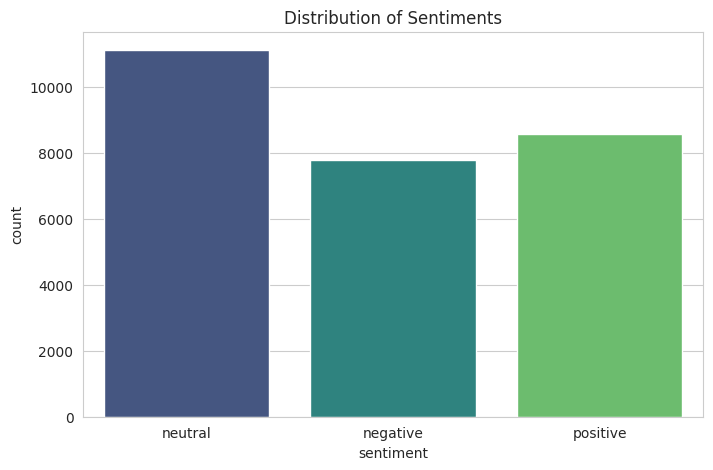

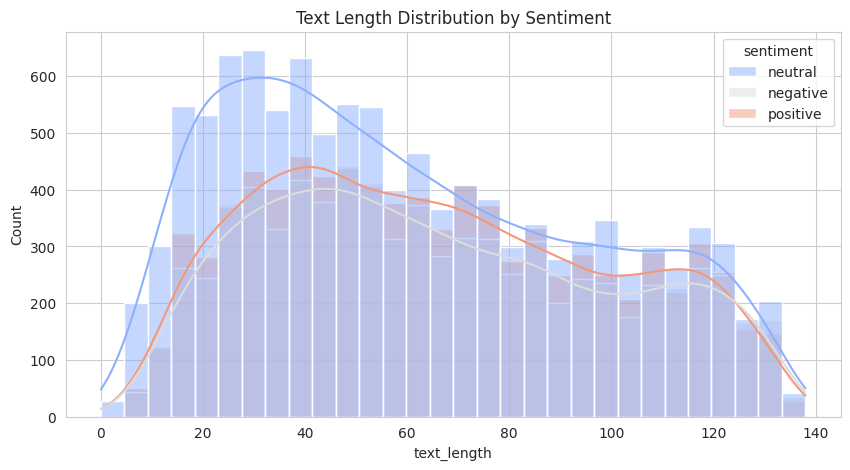


Generating Word Clouds...


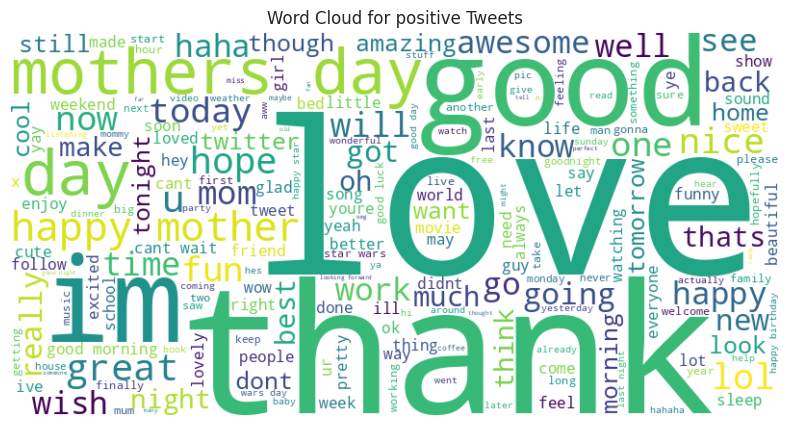

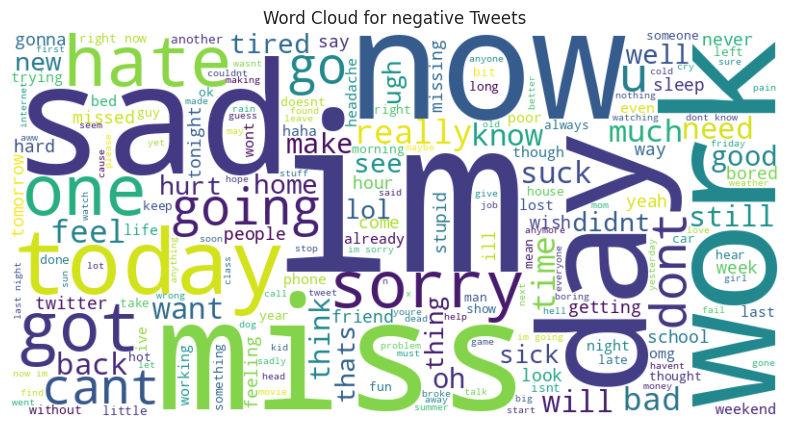

In [ ]:
sns.set_style("whitegrid")

# 4.1 Sentiment Distribution Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.show()

# 4.2 Text Length Analysis
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='text_length', hue='sentiment', kde=True, bins=30, palette='coolwarm')
plt.title('Text Length Distribution by Sentiment')
plt.show()

# 4.3 WordClouds
def plot_wordcloud(sentiment_label):
    text_data = " ".join(df[df['sentiment'] == sentiment_label]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_label} Tweets')
    plt.show()

print("\nGenerating Word Clouds...")
plot_wordcloud('positive')
plot_wordcloud('negative')

In [ ]:
# We use SentenceTransformer (all-MiniLM-L6-v2) as it is fast and effective
print("\n⏳ Loading Embedding Model (Sentence Transformers)...")
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

print("⏳ Generating Embeddings (this may take a moment)...")
X_embeddings = embedding_model.encode(df['clean_text'].tolist(), show_progress_bar=True)

# Encode Target Labels
le = LabelEncoder()
y_labels = le.fit_transform(df['sentiment'])
# Keep mapping for later
label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(f"Label Mapping: {label_mapping}")


⏳ Loading Embedding Model (Sentence Transformers)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

⏳ Generating Embeddings (this may take a moment)...


Batches:   0%|          | 0/859 [00:00<?, ?it/s]

Label Mapping: {np.int64(0): 'negative', np.int64(1): 'neutral', np.int64(2): 'positive'}



⏳ Training Model...

MODEL PERFORMANCE REPORT
              precision    recall  f1-score   support

    negative       0.67      0.64      0.66      1572
     neutral       0.64      0.69      0.66      2236
    positive       0.77      0.72      0.74      1688

    accuracy                           0.68      5496
   macro avg       0.69      0.68      0.69      5496
weighted avg       0.69      0.68      0.68      5496



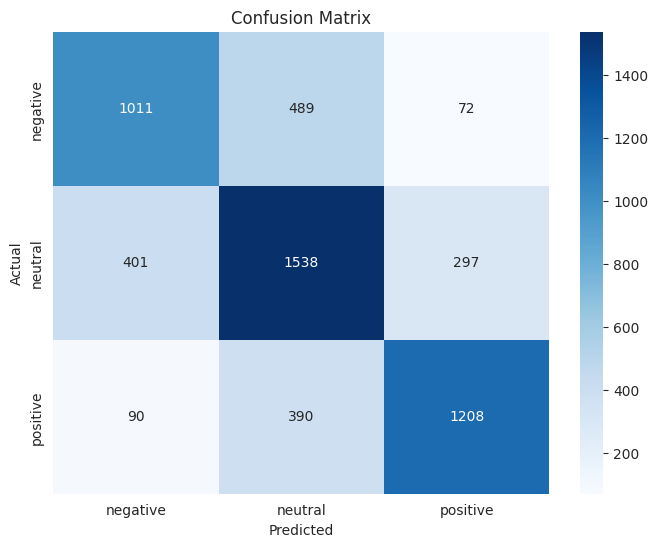


💡 INTERPRETATION:
- Diagonal elements represent correct predictions.
- Off-diagonal elements represent misclassifications.
- Check if the model confuses 'Neutral' with 'Positive' or 'Negative' often.


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y_labels, test_size=0.2, random_state=42)

# Initialize Classifier (Logistic Regression works very well with high-dim embeddings)
clf = LogisticRegression(max_iter=1000, random_state=42)

print("\n⏳ Training Model...")
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# --- METRICS ---
print("\n" + "="*40)
print("MODEL PERFORMANCE REPORT")
print("="*40)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\n💡 INTERPRETATION:")
print("- Diagonal elements represent correct predictions.")
print("- Off-diagonal elements represent misclassifications.")
print("- Check if the model confuses 'Neutral' with 'Positive' or 'Negative' often.")

In [ ]:
print("\n" + "="*40)
print("CUSTOM PREDICTIONS")
print("="*40)

custom_tweets = [
    "I absolutely love the new features in this update! Fantastic work.",
    "This service is terrible. I've been waiting for hours and no response.",
    "I went to the store today and bought some groceries.",
    "The movie was okay, not great but not bad either.",
    "Can't believe how fast the delivery was! Super happy."
]

# 1. Clean
clean_custom = [clean_text(t) for t in custom_tweets]
# 2. Embed
custom_embeddings = embedding_model.encode(clean_custom)
# 3. Predict
custom_preds = clf.predict(custom_embeddings)
# 4. Decode
custom_labels = le.inverse_transform(custom_preds)

for tweet, label in zip(custom_tweets, custom_labels):
    print(f"Tweet: {tweet}\nPred : {label}\n" + "-"*20)


CUSTOM PREDICTIONS
Tweet: I absolutely love the new features in this update! Fantastic work.
Pred : positive
--------------------
Tweet: This service is terrible. I've been waiting for hours and no response.
Pred : negative
--------------------
Tweet: I went to the store today and bought some groceries.
Pred : neutral
--------------------
Tweet: The movie was okay, not great but not bad either.
Pred : negative
--------------------
Tweet: Can't believe how fast the delivery was! Super happy.
Pred : positive
--------------------
